In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

import pickle
import sys
import pandas as pd

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot






In [5]:
with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieInten.pkl', 'rb') as file:
    mySeriesInten = pickle.load(file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcup.pkl', 'rb') as file:
        mySeriesOcup=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/mySeriesInten.pkl', 'rb') as file:
    timeSeries = pickle.load(file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieIntenTrT.pkl', 'rb') as file:
    singleSerieTrT = pickle.load(file)


with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieIntenValit.pkl', 'rb') as file:
    singleSerieValit= pickle.load(file)

# Gráfico de dispersión retardado

Un gráfico de dispersión retardado comprueba si los datos presentan una distribución aleatoria o no, cuando los datos son aleatorios no muestran ningún tipo de patrón identificable. En líneas generales, aquellas gráficas que presenten un patrón lineal estarán exentos de ser aleatorios. Pero, ¿qué es lag? En español desplazamiento, es un desplazamiento temporal fijo, dados unos puntos X1,X2,X3,X4,...,Xn X6 y X2 tienen un desfase de 4, pues 6-4=2, en líneas generales se utiliza un desfase de 1 para esta clase de gráficas. Además, también permiten saber si hay estacionalidad, valores anómalos, correlación entre puntos




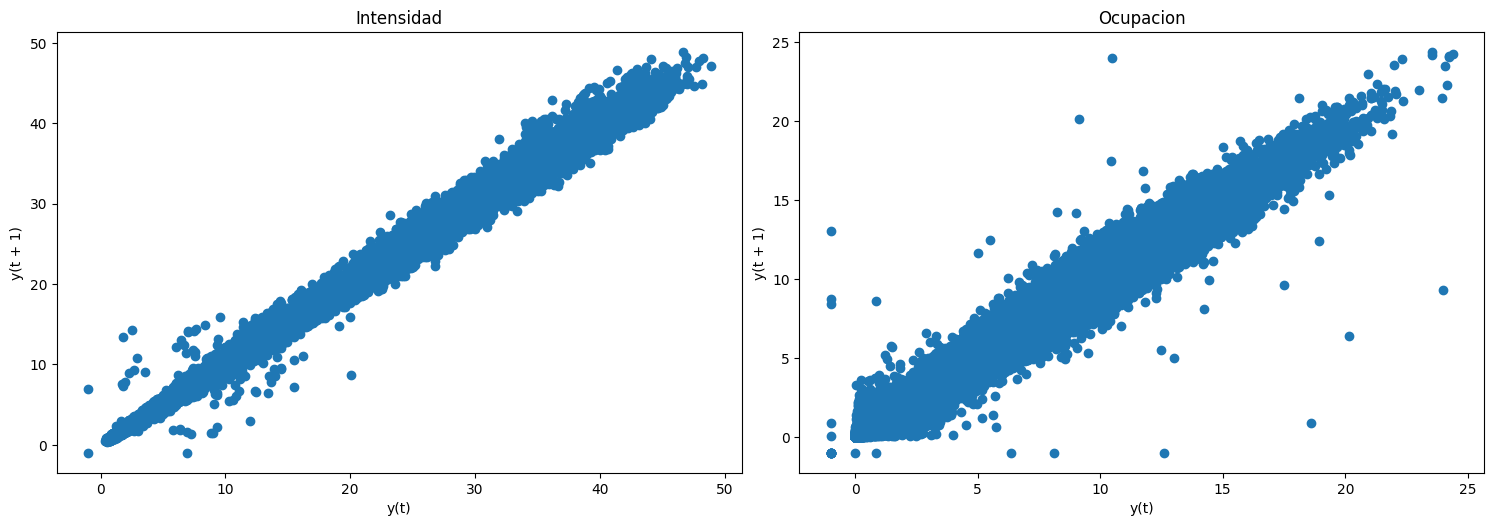

In [6]:
f2, (ax4,ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()
intendfdf = pd.DataFrame (singleSerieValit)
ocupdf=pd.DataFrame(mySeriesOcup)
lag_plot(intendfdf, ax=ax4)
ax4.set_title('Intensidad');
lag_plot(ocupdf, ax=ax5)
ax5.set_title('Ocupacion');



plt.show()

Vemos que presentan un patrón que se aleja de la aleatoriedad, es cierto que hay algunos puntos anómalos. En lo que se refiere a la estacionalidad, sobre todo en la intensidad podemos ver como una espiga en el inicio, lo que podría significar que para ciertas series temporales se cumple un patrón algo distinto al de la media. Sería interesante una vez haber divido en clústers comprobar sus patrones en esta clase de gráfica y comprobar la correlación para un periodo característico.

# Histograma de distribución

Con esta medida podremos saber de antemano que nos vamos a encontrar cuano comencemos a procesar y clusterizar los datos. Podremos ver la cantidad de muestras en las que se alcanza el máximo de intensidad y ocupación lo que nos permitirá hacernos una idea de si las vías se encuentran muy transitadas comunmente o hay muchos atascos con frecuencia.

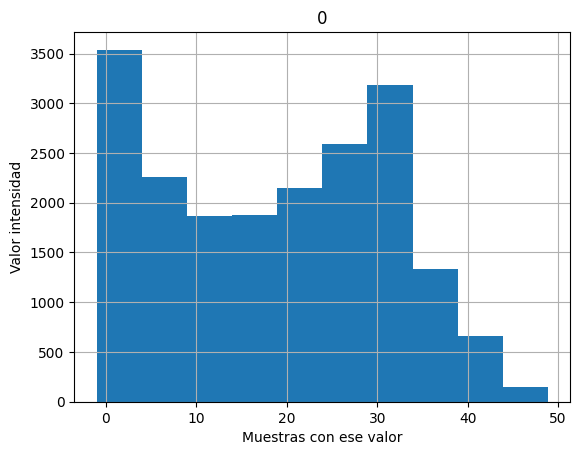

In [8]:
intendfdf.hist()

plt.xlabel('Muestras con ese valor')
plt.ylabel('Valor intensidad')

plt.show()


Como vemos para mayor intensidad no se recogen el máximo de valores, por lo general, la mayoría de muestras se suelen encontrar en los valores de menor intensidad y para mayor intensidad se recogen menos muestras con diferencia.

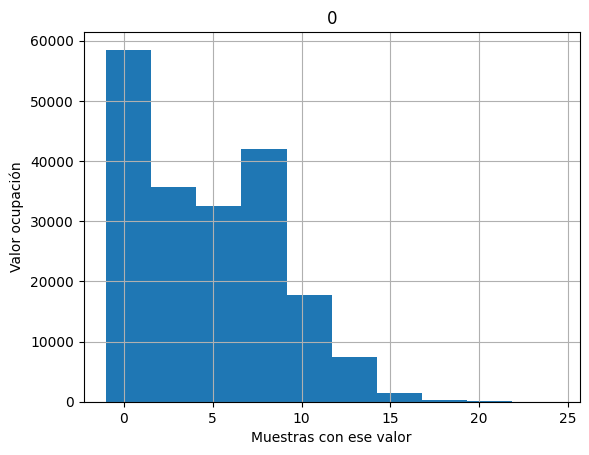

In [9]:
ocupdf.hist()
plt.xlabel('Muestras con ese valor')
plt.ylabel('Valor ocupación')

plt.show()

Para la ocupación encontramos un comportamiento muy similar, de forma que son pocas las muestras que alcanzar su mayor valor. Podemos observar que hay valores negativos, esto es bastante inesperado, pues esta columna debe tomar valores positivos siempre al tratarse de un número entero de coches.

Por último, una observación clave es que hay valores negativos, esto se debe a que en ocasiones los sensores sufren cortes de electricidad y cuando pierden la señal recogen un -1, de ahí los valores negativos. Esta explicación fue dada por el técnico que proporcionó los datos

In [ ]:
intendfdf.var()

0    160.330073
dtype: float64

La varizanza es relativamente alta lo que significa que hay una gran dispersión de los datos. Esto tiene sentido pues a lo largo de los días hay picos de incrementos de intensidad y momentos en los que es bastante baja.

In [ ]:
ocupdf.var()


0    15.098674
dtype: float64

Por el contrario, respecto a la vaianza tan alta que encontramos en la intensidad para la ocupación es mucho más baja, significando esto una mayor uniformidad de los datos, es decir, se alejan menos de la media.

In [ ]:
intendfdf.mean()

0    18.945524
dtype: float64

In [ ]:
ocupdf.mean()

0    4.794674
dtype: float64